<a href="https://colab.research.google.com/github/RodrigoOBC/Notebooks_RedesNeurais/blob/main/redeneural_C_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
temperatura_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperatura_df.reset_index(drop = True, inplace = True)

In [5]:
temperatura_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [6]:
temperatura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
X_train =  temperatura_df['Celsius']
Y_train =  temperatura_df['Fahrenheit']

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [26]:
epocas_hist = model.fit(X_train,Y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 5ms/step - loss: 9.6552e-05
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 4.6609e-06
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 3.4527e-05
Epoch 4/200
1/1 [==============================] - 0s 18ms/step - loss: 1.0281e-04
Epoch 5/200
1/1 [==============================] - 0s 19ms/step - loss: 7.7169e-05
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 9.1219e-06
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 1.4148e-05
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 6.2926e-05
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 5.6962e-05
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 1.0374e-05
Epoch 11/200
1/1 [==============================] - 0s 4ms/step - loss: 5.7452e-06
Epoch 12/200
1/1 [==============================] - 0s 5ms/step - loss: 3.8463e-05
Epoch 13/20

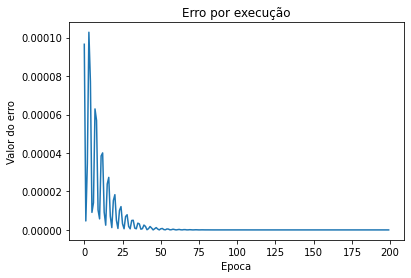

In [27]:
plt.plot(epocas_hist.history['loss'])
plt.title('Erro por execução')
plt.xlabel('Epoca')
plt.ylabel('Valor do erro');

In [28]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [29]:
temperatura_teste_C = 0
temperatura_teste_F = model.predict([temperatura_teste_C])
temperatura_teste_F

array([[32.]], dtype=float32)

In [30]:
temperatura_teste_C = 1369
temperatura_teste_F = model.predict([temperatura_teste_C])
temperatura_teste_F

array([[2496.2]], dtype=float32)